In [233]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor  #for VIF

## Task 2
#### Import “Train.csv” into your Jupyter notebook. 

In [235]:
pdata = pd.read_csv('C:\\Users\\stunn\\Notebook\\Capstone\\Train.csv')

## Task 2.1

#### Check the total number of observations and print a few records. Please note that the variable conversion in the raw data, similar to Task 1.2 should be applied 
#### Hint: Convert the relevant variables such as payment variables, Pay0-Pay6, and customer related variables (demographic) to categorical variables as appropriate.


In [237]:
pdata.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,2,120000,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
1,4,50000,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
2,5,50000,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
3,6,50000,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
4,7,500000,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0


In [238]:
pdata.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
count,26000.000000,26000.000000,26000.000000,26000.000000,26000.00000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,...,26000.000000,26000.000000,26000.000000,26000.000000,2.600000e+04,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000
mean,14996.430462,167440.846154,1.603654,1.853692,1.55200,35.492115,-0.014846,-0.133308,-0.165154,-0.218808,...,43257.653308,40279.748731,38857.180192,5659.285346,5.883375e+03,5247.787385,4829.973538,4848.178808,5198.692192,0.221308
std,8663.219017,129672.200019,0.489147,0.794793,0.52183,9.208619,1.120603,1.196524,1.195702,1.167831,...,64212.237894,60593.196802,59331.740317,15957.380183,2.250423e+04,16927.253814,15446.282870,15621.391198,17600.463320,0.415135
min,2.000000,10000.000000,1.000000,0.000000,0.00000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7479.750000,50000.000000,1.000000,1.000000,1.00000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2400.000000,1813.000000,1261.000000,1000.000000,8.330000e+02,396.000000,300.000000,251.000000,128.750000,0.000000
50%,14969.500000,140000.000000,2.000000,2.000000,2.00000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19117.500000,18167.500000,17203.500000,2106.000000,2.010000e+03,1831.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.00000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54833.250000,50289.000000,49350.250000,5009.000000,5.000000e+03,4504.250000,4023.000000,4031.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.00000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,505000.000000,1.684259e+06,896040.000000,528897.000000,426529.000000,528666.000000,1.000000


In [239]:
pdata.shape

(26000, 25)

In [240]:
pdata.nunique()

ID           26000
LIMIT_BAL       79
SEX              2
EDUCATION        7
MARRIAGE         4
AGE             56
PAY_0           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5            9
PAY_6            9
BILL_AMT1    20093
BILL_AMT2    19727
BILL_AMT3    19467
BILL_AMT4    19063
BILL_AMT5    18633
BILL_AMT6    18280
PAY_AMT1      7239
PAY_AMT2      7214
PAY_AMT3      6931
PAY_AMT4      6356
PAY_AMT5      6305
PAY_AMT6      6325
Default          2
dtype: int64

In [241]:
#pdata.info()

In [242]:
# Check for missing values if any.
pdata.isnull().values.any()

False

In [243]:
# Convert the relevant variables such as payment variables (Pay0-Pay6 and customer related variables) to categorical variables as appropriate.

payment_columns = ['SEX','EDUCATION','MARRIAGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
pdata[payment_columns] = pdata[payment_columns].astype('category')

In [244]:
#pdata.info()

## Task 2.2

#### Fit a logistic regression after making the dataset balanced. 
#### Hint: Use class weight parameter.



<Axes: xlabel='Default', ylabel='count'>

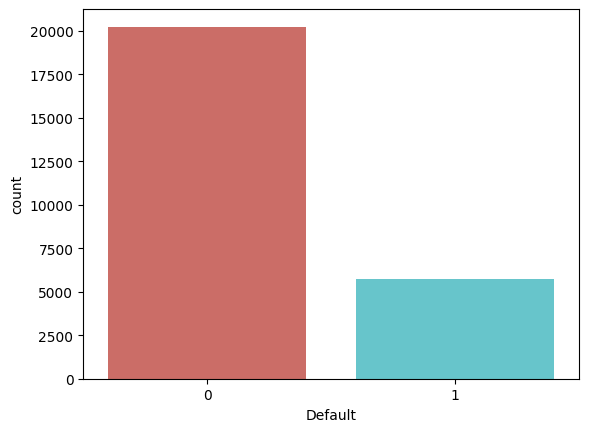

In [246]:
sns.countplot(x='Default', hue='Default',data=pdata, palette='hls', legend=False)

In [247]:
pdata['Default'].value_counts()

Default
0    20246
1     5754
Name: count, dtype: int64

## Task 2.3

#### Remove the variable(s) that would cause multicollinearity. 

#### Explicitly state the variable(s) that you are dropping in a markdown cell in your Jupyter notebook. Hint: To remove a variable, use the drop function.


In [249]:
# Dropping irrelevant columns and columns that cause multicolinearity

pdata.drop(['ID', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'],axis=1,inplace=True)
pdata.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,120000,2,2,2,26,-1,2,0,0,0,2,2682,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
1,50000,2,2,1,37,0,0,0,0,0,0,46990,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
2,50000,1,2,1,57,-1,0,-1,0,0,0,8617,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
3,50000,1,1,2,37,0,0,0,0,0,0,64400,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
4,500000,1,1,2,29,0,0,0,0,0,0,367965,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0


## Task 2.2

#### Fit a logistic regression after making the dataset balanced. 

#### Hint: Use class weight parameter.

Variable(s) that would cause multicollinearity: 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'

In [252]:
X_train = pdata.iloc[:,0:-1].values
y_train = pdata['Default'].values

In [253]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)                    #fit is to find the mean and std

X_train = scaler.transform(X_train)    #transform is to transform the mean to 0 and std to 1

In [254]:
LogReg = LogisticRegression(class_weight = 'balanced', random_state=0)
LogReg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=0)

## Import “Test.csv” into your Jupyter notebook. 

In [256]:
pdataT = pd.read_csv('C:\\Users\\stunn\\Notebook\\Capstone\\Test.csv')
pdataT.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,5170,140000,2,2,2,26,0,0,2,0,...,125046,46364.0,83460,125000,6.0,4578.0,1427.0,87179.0,26291.0,1
1,22727,90000,2,1,2,31,1,-2,-2,-2,...,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0
2,4884,150000,2,1,2,32,2,2,2,0,...,123954,131543.0,134319,6000,3000.0,4600.0,9800.0,5100.0,5000.0,1
3,7142,30000,2,2,2,21,-2,-2,-2,-2,...,4311,1551.0,0,780,3260.0,4311.0,1551.0,0.0,0.0,0
4,19043,70000,2,2,2,23,2,2,2,0,...,18013,19315.0,19859,2850,0.0,1400.0,1600.0,1000.0,0.0,1


In [257]:
pdataT.shape

(4000, 25)

In [258]:
pdataT.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4.000000e+03,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,15026.952000,167766.920000,1.604250,1.849500,1.551000,35.442500,-0.028750,-0.136750,-0.173000,-0.232750,...,43297.370750,40517.140500,38966.531750,5691.499000,6.166790e+03,5081.993250,4800.748500,4482.245000,5324.770000,0.220500
std,8643.076205,130253.005957,0.489072,0.760917,0.522941,9.279074,1.144443,1.201628,1.204547,1.177677,...,65119.528659,62113.886408,60987.217209,20062.772465,2.626496e+04,21509.687962,17028.343866,12823.661046,18889.547996,0.414636
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-17250.000000,-61372.000000,-150953.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7633.000000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1829.000000,1479.750000,1199.750000,1000.000000,8.315000e+02,348.750000,200.000000,264.000000,64.000000,0.000000
50%,15188.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,18641.000000,17718.000000,15964.000000,2062.000000,2.000000e+03,1698.500000,1500.000000,1534.500000,1487.500000,0.000000
75%,22500.000000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,51830.750000,49536.000000,48163.250000,5000.000000,5.000000e+03,4508.250000,4000.000000,4058.500000,4000.000000,0.000000
max,29974.000000,760000.000000,2.000000,6.000000,3.000000,71.000000,8.000000,7.000000,8.000000,8.000000,...,525749.000000,508213.000000,513798.000000,873552.000000,1.215471e+06,889043.000000,621000.000000,223765.000000,527143.000000,1.000000


<Axes: xlabel='Default', ylabel='count'>

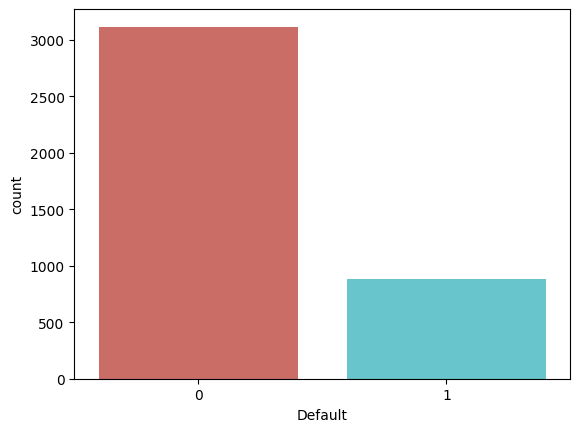

In [259]:
sns.countplot(x='Default', hue='Default',data=pdataT, palette='hls', legend=False)

In [260]:
# Convert the relevant variables such as payment variables (Pay0-Pay6 and customer related variables) to categorical variables as appropriate.

payment_columns = ['SEX','EDUCATION','MARRIAGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
pdataT[payment_columns] = pdataT[payment_columns].astype('category')

In [261]:
# Dropping irrelevant columns and columns that cause multicolinearity

pdataT.drop(['ID', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'],axis=1,inplace=True)
pdataT.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,140000,2,2,2,26,0,0,2,0,0,-1,28282.0,125000,6.0,4578.0,1427.0,87179.0,26291.0,1
1,90000,2,1,2,31,1,-2,-2,-2,-2,-2,0.0,0,0.0,0.0,0.0,0.0,0.0,0
2,150000,2,1,2,32,2,2,2,0,0,2,120800.0,6000,3000.0,4600.0,9800.0,5100.0,5000.0,1
3,30000,2,2,2,21,-2,-2,-2,-2,-2,-2,0.0,780,3260.0,4311.0,1551.0,0.0,0.0,0
4,70000,2,2,2,23,2,2,2,0,0,2,14871.0,2850,0.0,1400.0,1600.0,1000.0,0.0,1


## Task 2.4

#### Test the model on the test dataset. Please note that the variable conversion in the raw data, similar to Task 1.2 should be applied. 

#### Hint: Convert the relevant variables such as payment variables, Pay0-Pay6, and customer related variables (demographic) to categorical variables as appropriate.


In [263]:
X_test = pdataT.iloc[:,:-1].values
y_test = pdataT['Default'].values

In [264]:
X_test = scaler.transform(X_test)

print("x_test after Scaling -1 < x_test < +1 \n")
print(X_test)

x_test after Scaling -1 < x_test < +1 

[[-0.2116211   0.81029533  0.1840864  ... -0.22031443  5.27049118
   1.19841808]
 [-0.59721618  0.81029533 -1.07412767 ... -0.31270089 -0.31036109
  -0.29537814]
 [-0.13450209  0.81029533 -1.07412767 ...  0.32176816  0.01612059
  -0.01128925]
 ...
 [ 0.86804511 -1.23411793 -1.07412767 ... -0.31270089  0.03372499
  -0.22918543]
 [ 1.17652116  0.81029533  1.44230046 ...  0.65842521  0.59764208
   0.6606378 ]
 [-0.05738307  0.81029533  0.1840864  ... -0.28745161 -0.27297574
  -0.29020773]]


In [265]:
y_pred = LogReg.predict(X_test)

## Task 2.5

#### Plot the confusion matrix.


In [267]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[2218,  900],
       [ 313,  569]], dtype=int64)

In [268]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.71      0.79      3118
           1       0.39      0.65      0.48       882

    accuracy                           0.70      4000
   macro avg       0.63      0.68      0.63      4000
weighted avg       0.77      0.70      0.72      4000



## Task 2.6

#### Provide your insights on accuracy, precision and F1 Score in a markdown cell in your Jupyter notebook.


Accuracy 0.70 is considered average because it means the model correctly predicts 7 out of 10 instances. For example, 70% accuracy would mean that out of 1000 cases, 700 are correctly classified as default or not default.

Precision of 88% indicates strong performance. Of the non-defaulters predicted, 88% are truly non-defaulters.
Precision of 39% indicates poor performance. Of the defaulters predicted, 39% are truly defaulters.

Recall of 71% means, 71% of actual non-defaulters are identified.
Recall of 65% means, 65% of actual defaulters are identified.

An F1 score of 0.79 signifies a balanced trade-off between Precision and Recall, crucial when both false positives and negatives have significant consequences.